In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


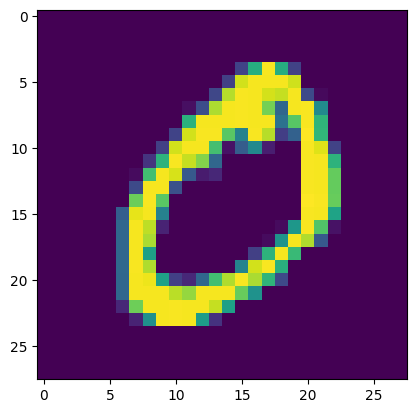

In [3]:
print(x_train.shape)
plt.imshow(x_train[1])

In [4]:
# Adding noise to images
noise_factor = 0.7
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

(60000, 28, 28)


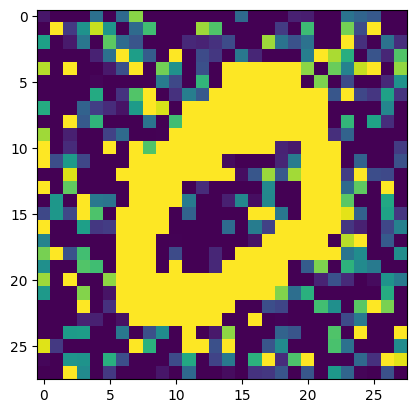

In [5]:
print(x_train_noisy.shape)
plt.imshow(x_train_noisy[1])

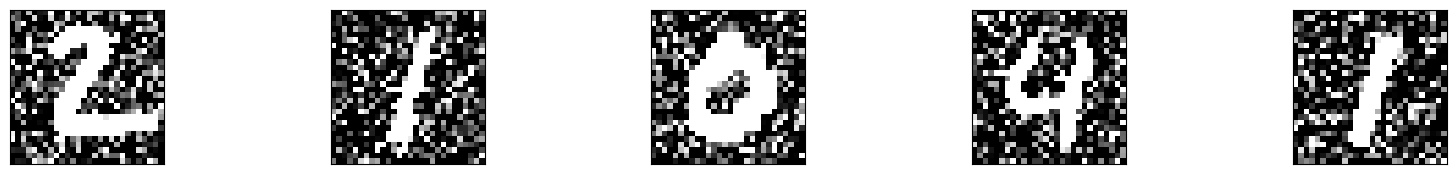

In [6]:
# Plotting some noisy images
plt.figure(figsize=(20, 2))
for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [7]:
# Defining autoencoder
model = Sequential()

# Encoder network
model.add(Conv2D(35, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))

# Decoder network
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(35, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))

model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output layer

In [8]:
model.compile(optimizer= 'adam', loss = 'binary_crossentropy')

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 35)        350       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 35)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 25)        7900      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 25)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 25)          5650      
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 25)        0

In [10]:
#Train the auto encoder
# Note that train data is the noisy data
# test data is the original data
# we are training a Auto encoder-decoder model to construct images from noisy images
model.fit(x_train_noisy,
          x_train,
          epochs=15,
          batch_size=128,
          validation_data=(x_test_noisy, x_test))

Epoch 1/15
469/469 [==============================] - 170s 358ms/step - loss: -489.9679 - val_loss: -509.7624
Epoch 2/15
469/469 [==============================] - 165s 352ms/step - loss: -502.7963 - val_loss: -510.2775
Epoch 3/15
469/469 [==============================] - 162s 347ms/step - loss: -503.2125 - val_loss: -510.6179
Epoch 4/15
469/469 [==============================] - 164s 350ms/step - loss: -503.4626 - val_loss: -510.8079
Epoch 5/15
469/469 [==============================] - 169s 361ms/step - loss: -503.6110 - val_loss: -510.9302
Epoch 6/15
469/469 [==============================] - 165s 352ms/step - loss: -503.7134 - val_loss: -510.8570
Epoch 7/15
469/469 [==============================] - 166s 354ms/step - loss: -503.8005 - val_loss: -511.0844
Epoch 8/15
469/469 [==============================] - 175s 373ms/step - loss: -503.8685 - val_loss: -511.0771
Epoch 9/15
469/469 [==============================] - 173s 369ms/step - loss: -503.9307 - val_loss: -511.1823
Epoch 10/1

313/313 [==============================] - 7s 23ms/step


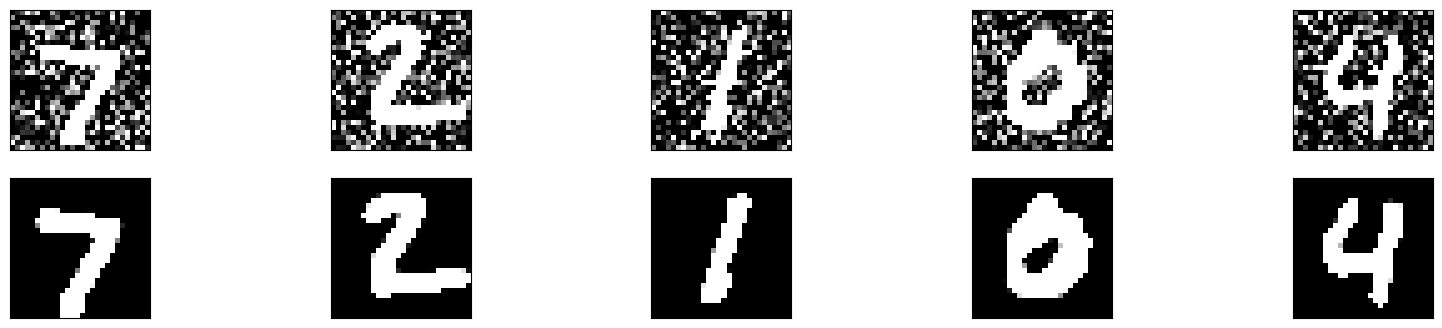

In [11]:
# Making predictions with a trained autoencoder to generate the denoised image
pred = model.predict(x_test_noisy)
# Checking results
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()